In [1]:
""" Job characteristics Analysis

After evaluating the correlation between the demographic factors and happiness, I will now test a few hypothesis depending on the job characteristic.

"""

' Job characteristics Analysis\n\nAfter evaluating the correlation between the demographic factors and happiness, I will now test a few hypothesis depending on the job characteristic.\n\n'

In [2]:
#Importing the librairies

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Importing the data and data exploration

In [5]:
Survey_data = pd.read_csv("Survey_data.csv")

In [6]:
Survey_data.head()

,Person_id,Age,Gender,Industry,Job_level,Work-life_balance,Remote_frequency,Stress_level,Important_Aspect,Job_satisfaction,Happiness_level
0,20240109223046,25-34,Female,Business,Entry-level,5,Everyday,3,Recognition and appreciation,5,NaN
1,20240109223634,25-34,Female,Technology,Entry-level,5,Everyday,4,Compensation and benefits,6,8.0
2,20240110095600,25-34,Female,Technology,Entry-level,1,Everyday,5,all of them!,3,3.0
3,20240110095541,25-34,Female,Business,Entry-level,2,Everyday,4,Work relationships,4,6.0
4,20240110103651,35-44,Male,Healthcare,Senior-level,2,Never,3,Opportunities for growth,4,8.0


In [7]:
#Starting the Analysis

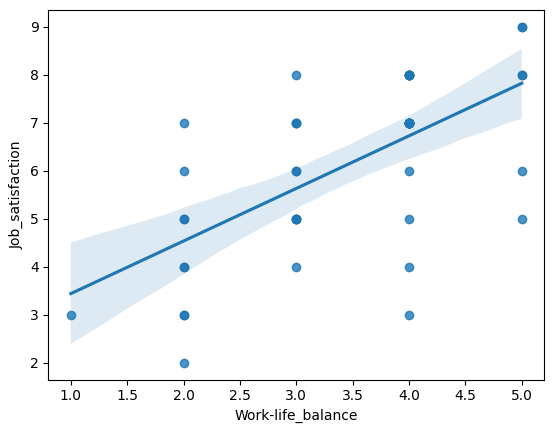

Correlation coefficient: 0.631330428311326


In [8]:
""" Is there a correlation between job satisfaction and work-life balance score? """

Survey_data['Work-life_balance'] = pd.to_numeric(Survey_data['Work-life_balance'])

sns.regplot(x='Work-life_balance', y='Job_satisfaction', data=Survey_data)
plt.show()

correlation_coefficient = Survey_data['Work-life_balance'].corr(Survey_data['Job_satisfaction'])
print(f"Correlation coefficient: {correlation_coefficient}")


**There is a strong positive correlation between the Job satisfaction and work life balance score.**






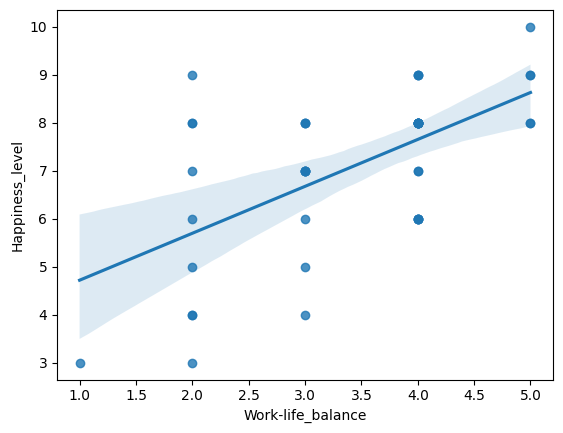

Correlation coefficient: 0.5905217799077104


In [9]:
""" Is there a correlation between job satisfaction and happiness level? """

Survey_data['Work-life_balance'] = pd.to_numeric(Survey_data['Work-life_balance'])

sns.regplot(x='Work-life_balance', y='Happiness_level', data=Survey_data)
plt.show()

correlation_coefficient = Survey_data['Work-life_balance'].corr(Survey_data['Happiness_level'])
print(f"Correlation coefficient: {correlation_coefficient}")


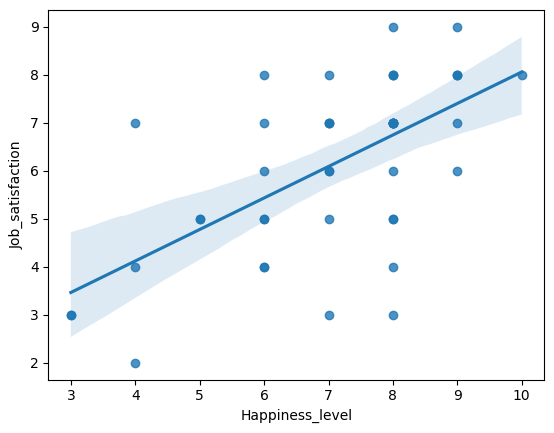

Correlation coefficient: 0.612094546367302


In [10]:
""" Is there a correlation between job satisfaction and happiness level? """

data_subset = Survey_data[['Job_satisfaction', 'Happiness_level']].dropna()

sns.regplot(x='Happiness_level', y='Job_satisfaction', data=Survey_data)
plt.show()

correlation_coefficient = Survey_data['Happiness_level'].corr(Survey_data['Job_satisfaction'])
print(f"Correlation coefficient: {correlation_coefficient}")

**There is a strong positive correlation between the job-satisfaction and the happiness level.**

In [11]:
""" Doing the same but with a linear regression approach. """

' Doing the same but with a linear regression approach. '

In [12]:
import statsmodels.api as sm

Survey_data['Intercept'] = 1

Survey_data = Survey_data.dropna(subset=['Intercept', 'Happiness_level', 'Job_satisfaction'])

Survey_data.replace([np.inf, -np.inf], np.nan, inplace=True)
Survey_data.dropna(subset=['Intercept', 'Happiness_level', 'Job_satisfaction'], inplace=True)

X = Survey_data[['Intercept', 'Happiness_level']]
y = Survey_data['Job_satisfaction']
model = sm.OLS(y, X).fit()

# Print the summary of the regression analysis
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       Job_satisfaction   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     25.76
Date:                Fri, 26 Jan 2024   Prob (F-statistic):           7.90e-06
Time:                        17:06:06   Log-Likelihood:                -79.018
No. Observations:                  45   AIC:                             162.0
Df Residuals:                      43   BIC:                             165.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.4951      0.938     

<ipython-input-12-a98b8a936d58>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Survey_data.replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-12-a98b8a936d58>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Survey_data.dropna(subset=['Intercept', 'Happiness_level', 'Job_satisfaction'], inplace=True)


**P-value for 'Happiness_level':**

The p-value associated with 'Happiness_level' is very small (close to 0). This suggests that there is strong evidence to reject the null hypothesis that there is no linear relationship between happiness level and job satisfaction.

**R-squared:**

The R-squared value is 0.375, indicating that approximately 37.5% of the variability in job satisfaction is explained by the model.


In [13]:
""" Hypothesis: Does the job satisfaction score differs based on job levels?"

Null Hypothesis (H0): There is no significant difference in job satisfaction across different job levels.
Alternative Hypothesis (H1): There is a significant difference in job satisfaction levels across different job levels."""

from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Survey_data['Job_level_grouped'] = np.where(
    (Survey_data['Job_level'] == 'study') | (Survey_data['Job_level'] == 'Executive/Leadership'),
    'Other',
    Survey_data['Job_level']
)

data_subset = Survey_data[['Job_level_grouped', 'Job_satisfaction']].dropna()

print("Number of observations per grouped job level:")
print(data_subset['Job_level_grouped'].value_counts())

# ANOVA test
f_statistic, p_value = f_oneway(
    data_subset[data_subset['Job_level_grouped'] == 'Entry-level']['Job_satisfaction'],
    data_subset[data_subset['Job_level_grouped'] == 'Mid-level']['Job_satisfaction'],
    data_subset[data_subset['Job_level_grouped'] == 'Senior-level']['Job_satisfaction'],
    data_subset[data_subset['Job_level_grouped'] == 'Other']['Job_satisfaction']
)

print(f"\nANOVA F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


Number of observations per grouped job level:
Mid-level       20
Entry-level     16
Senior-level     6
Other            2
study            1
Name: Job_level_grouped, dtype: int64

ANOVA F-statistic: 2.0993461617909746
P-value: 0.11555418817800102


**P-value is low so we keep the null hypothesis:
There isn't strong statistical evidence to conclude that job satisfaction levels significantly differ among the job levels considered (Mid-level, Entry-level, Senior-level, and Other).**

In [14]:
""" Hypothesis: Does the job_satisfaction differs based on the industry?

Null Hypothesis (H0): There is no significant difference in job satisfaction across different industries.
Alternative Hypothesis (H1): There is a significant difference in job satisfaction levels across industries."""

' Hypothesis: Does the job_satisfaction differs based on the industry?\n\nNull Hypothesis (H0): There is no significant difference in job satisfaction across different industries.\nAlternative Hypothesis (H1): There is a significant difference in job satisfaction levels across industries.'

In [15]:
Survey_data["Industry"].value_counts()

Technology                   13
Education                     9
Finance                       6
Healthcare                    5
Business                      3
Insurance Sector              1
Construction                  1
Science                       1
Supply Chain                  1
Construction sector           1
Automotive                    1
I do not work currently .     1
Insurance                     1
hospitality                   1
Name: Industry, dtype: int64

In [16]:
from scipy.stats import kruskal

statistic, p_value = kruskal(
    Survey_data[Survey_data['Industry'] == 'Technology']['Job_satisfaction'],
    Survey_data[Survey_data['Industry'] == 'Education']['Job_satisfaction'],
    Survey_data[Survey_data['Industry'] == 'Finance']['Job_satisfaction'],
    Survey_data[Survey_data['Industry'] == 'Healthcare']['Job_satisfaction'],
    Survey_data[Survey_data['Industry'] == 'Business']['Job_satisfaction'],
    Survey_data[Survey_data['Industry'] == 'Insurance Sector']['Job_satisfaction'],
    Survey_data[Survey_data['Industry'] == 'Construction']['Job_satisfaction'],
    Survey_data[Survey_data['Industry'] == 'Science']['Job_satisfaction'],
    Survey_data[Survey_data['Industry'] == 'Supply Chain']['Job_satisfaction'],
    Survey_data[Survey_data['Industry'] == 'Construction sector']['Job_satisfaction'],
    Survey_data[Survey_data['Industry'] == 'Automotive']['Job_satisfaction'],
    Survey_data[Survey_data['Industry'] == 'I do not work currently .']['Job_satisfaction'],
    Survey_data[Survey_data['Industry'] == 'Insurance']['Job_satisfaction'],
    Survey_data[Survey_data['Industry'] == 'hospitality']['Job_satisfaction']
)

print(f"Kruskal-Wallis statistic: {statistic}")
print(f"P-value: {p_value}")



Kruskal-Wallis statistic: nan
P-value: nan


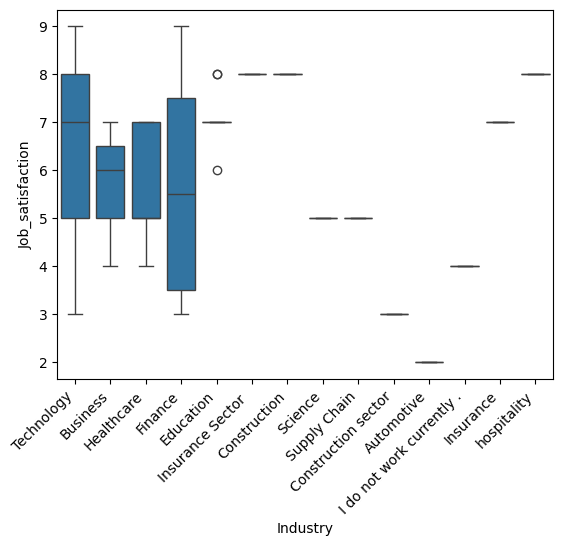

In [17]:
sns.boxplot(x='Industry', y='Job_satisfaction', data=Survey_data)
plt.xticks(rotation=45, ha='right')
plt.show()

In [18]:
industry_stats = Survey_data.groupby('Industry')['Job_satisfaction'].describe()
print(industry_stats)


                           count      mean       std  min  25%  50%  75%  max
Industry                                                                     
Automotive                   1.0  2.000000       NaN  2.0  2.0  2.0  2.0  2.0
Business                     3.0  5.666667  1.527525  4.0  5.0  6.0  6.5  7.0
Construction                 1.0  8.000000       NaN  8.0  8.0  8.0  8.0  8.0
Construction sector          1.0  3.000000       NaN  3.0  3.0  3.0  3.0  3.0
Education                    9.0  7.111111  0.600925  6.0  7.0  7.0  7.0  8.0
Finance                      6.0  5.666667  2.503331  3.0  3.5  5.5  7.5  9.0
Healthcare                   5.0  5.600000  1.341641  4.0  5.0  5.0  7.0  7.0
I do not work currently .    1.0  4.000000       NaN  4.0  4.0  4.0  4.0  4.0
Insurance                    1.0  7.000000       NaN  7.0  7.0  7.0  7.0  7.0
Insurance Sector             1.0  8.000000       NaN  8.0  8.0  8.0  8.0  8.0
Science                      1.0  5.000000       NaN  5.0  5.0  

In [19]:
""" Hypothesis: Does the job_satisfaction differs based on the remote_frequency?

Null Hypothesis (H0): There is no significant difference in job satisfaction across different remote frequencies.
Alternative Hypothesis (H1): There is a significant difference in job satisfaction levels across remote frequencies."""

' Hypothesis: Does the job_satisfaction differs based on the remote_frequency?\n\nNull Hypothesis (H0): There is no significant difference in job satisfaction across different remote frequencies.\nAlternative Hypothesis (H1): There is a significant difference in job satisfaction levels across remote frequencies.'

In [20]:
Survey_data["Remote_frequency"].value_counts()

Everyday               15
A few times a week     15
Never                   7
A few times a month     4
Once a week             4
Name: Remote_frequency, dtype: int64

In [21]:
remote_frequency_mapping = {
    "Never":1,
    "A few times a month":2,
    "Once a week":3,
    "A few times a week":4,
    "Everyday":5,
}

In [22]:
Survey_data['Remote_Frequency_Numeric'] = Survey_data['Remote_frequency'].replace(remote_frequency_mapping)

In [23]:
Survey_data.head()

,Person_id,Age,Gender,Industry,Job_level,Work-life_balance,Remote_frequency,Stress_level,Important_Aspect,Job_satisfaction,Happiness_level,Intercept,Job_level_grouped,Remote_Frequency_Numeric
1,20240109223634,25-34,Female,Technology,Entry-level,5,Everyday,4,Compensation and benefits,6,8.0,1,Entry-level,5
2,20240110095600,25-34,Female,Technology,Entry-level,1,Everyday,5,all of them!,3,3.0,1,Entry-level,5
3,20240110095541,25-34,Female,Business,Entry-level,2,Everyday,4,Work relationships,4,6.0,1,Entry-level,5
4,20240110103651,35-44,Male,Healthcare,Senior-level,2,Never,3,Opportunities for growth,4,8.0,1,Senior-level,1
5,20240110112002,25-34,Female,Finance,Mid-level,3,A few times a week,4,Compensation and benefits,6,7.0,1,Mid-level,4


In [24]:
Survey_data['Remote_Frequency_Numeric'] = np.where(
    (Survey_data['Remote_Frequency_Numeric'] == 2) | (Survey_data['Remote_Frequency_Numeric'] == 3),
    6,
    Survey_data['Remote_Frequency_Numeric']
)

data_subset = Survey_data[['Remote_Frequency_Numeric', 'Job_satisfaction']].dropna()

print("Number of observations per remote frequency:")
print(data_subset['Remote_Frequency_Numeric'].value_counts())

f_statistic, p_value = f_oneway(
    data_subset[data_subset['Remote_Frequency_Numeric'] == 1]['Job_satisfaction'],
    data_subset[data_subset['Remote_Frequency_Numeric'] == 4]['Job_satisfaction'],
    data_subset[data_subset['Remote_Frequency_Numeric'] == 5]['Job_satisfaction'],
    data_subset[data_subset['Remote_Frequency_Numeric'] == 99]['Job_satisfaction']
)

print(f"\nANOVA F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


Number of observations per remote frequency:
5    15
4    15
6     8
1     7
Name: Remote_Frequency_Numeric, dtype: int64

ANOVA F-statistic: nan
P-value: nan


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


**P-value is greater than the significance level (0.05). Therefore, there is no statistically significant difference in job satisfaction levels across different remote frequencies based on the current data and the chosen significance level.**

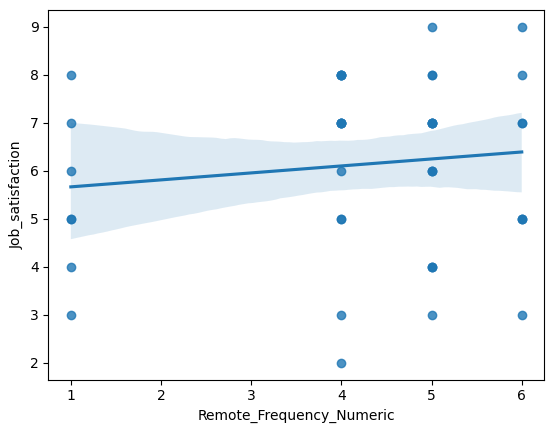

Correlation coefficient: 0.12699734521407358


In [25]:
""" Is there a correlation between job satisfaction and remote frequency? """

data_subset = Survey_data[['Job_satisfaction', 'Remote_Frequency_Numeric']].dropna()

sns.regplot(x='Remote_Frequency_Numeric', y='Job_satisfaction', data=Survey_data)
plt.show()

correlation_coefficient = Survey_data['Remote_Frequency_Numeric'].corr(Survey_data['Job_satisfaction'])
print(f"Correlation coefficient: {correlation_coefficient}")

**The correlation coefficient is very low and the lign is almost horrizontal, so the job satisfaction doesn't depend on the remote frequency.**

In [26]:
""" What about remote_frequency and work life balance? """

' What about remote_frequency and work life balance? '

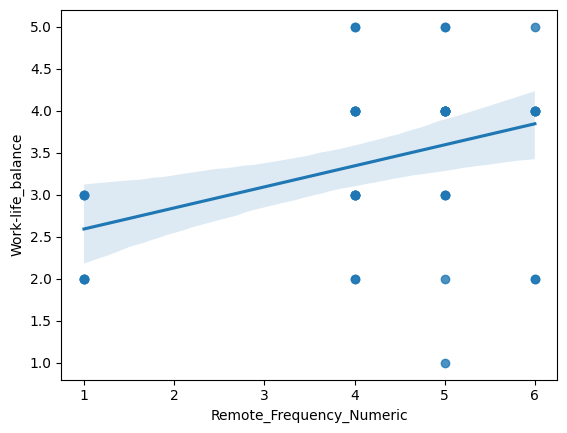

Correlation coefficient: 0.3885618379545015


In [27]:
data_subset = Survey_data[['Work-life_balance', 'Remote_Frequency_Numeric']].dropna()

sns.regplot(x='Remote_Frequency_Numeric', y='Work-life_balance', data=Survey_data)
plt.show()

correlation_coefficient = Survey_data['Remote_Frequency_Numeric'].corr(Survey_data['Work-life_balance'])
print(f"Correlation coefficient: {correlation_coefficient}")

**There is a moderate positive relationship betweeen the remote frequency and the work-life balance. This means that those who work more often from home tend to have a better work-life balance.**

In [28]:
#Using linear regression to analyse the relationship between the stress level and the job satisfaction

In [29]:
import statsmodels.api as sm

Survey_data['Intercept'] = 1

X = Survey_data[['Intercept', 'Stress_level']]
y = Survey_data['Job_satisfaction']

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       Job_satisfaction   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.1390
Date:                Fri, 26 Jan 2024   Prob (F-statistic):              0.711
Time:                        17:06:11   Log-Likelihood:                -89.509
No. Observations:                  45   AIC:                             183.0
Df Residuals:                      43   BIC:                             186.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.4495      0.890      7.248   

                            OLS Regression Results                            
Dep. Variable:       Job_satisfaction   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.1390
Date:                Fri, 26 Jan 2024   Prob (F-statistic):              0.711
Time:                        17:06:11   Log-Likelihood:                -89.509
No. Observations:                  45   AIC:                             183.0
Df Residuals:                      43   BIC:                             186.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.4495      0.890      7.248   

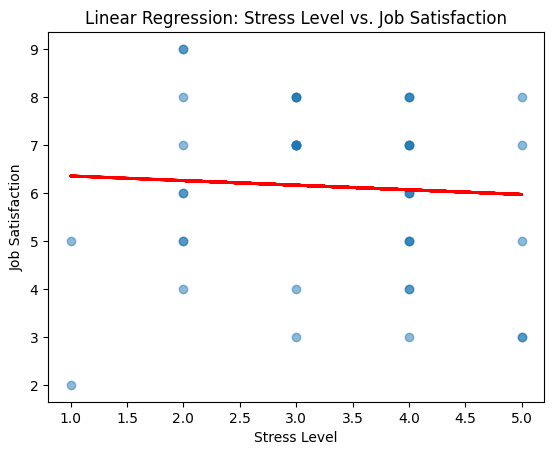

In [30]:
Survey_data['const'] = 1

model = sm.OLS(Survey_data['Job_satisfaction'], Survey_data[['const', 'Stress_level']])
result = model.fit()

print(result.summary())

# Visualize the relationship
plt.scatter(Survey_data['Stress_level'], Survey_data['Job_satisfaction'], alpha=0.5)
plt.plot(Survey_data['Stress_level'], result.predict(), color='red', linewidth=2)
plt.xlabel('Stress Level')
plt.ylabel('Job Satisfaction')
plt.title('Linear Regression: Stress Level vs. Job Satisfaction')
plt.show()

Based on the results, there is not enough evidence to conclude that there is a significant linear relationship between stress level and job satisfaction in the given dataset. The p-values for both the individual predictor and the overall model are high, indicating that the model is not statistically significant.


In [31]:
# Analysing the Most important aspect column

In [32]:
Survey_data["Important_Aspect"].value_counts()

Work-Life Balance               9
Work relationships              8
Opportunities for growth        8
Compensation and benefits       7
Job fit and skills match        3
Meaningful work                 3
Autonomy and empowerment        2
Recognition and appreciation    2
Company culture                 2
all of them!                    1
Name: Important_Aspect, dtype: int64

<ipython-input-33-984ac1a6e132>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_pivot_table.index, y=sorted_pivot_table['Job_satisfaction'], palette='viridis')


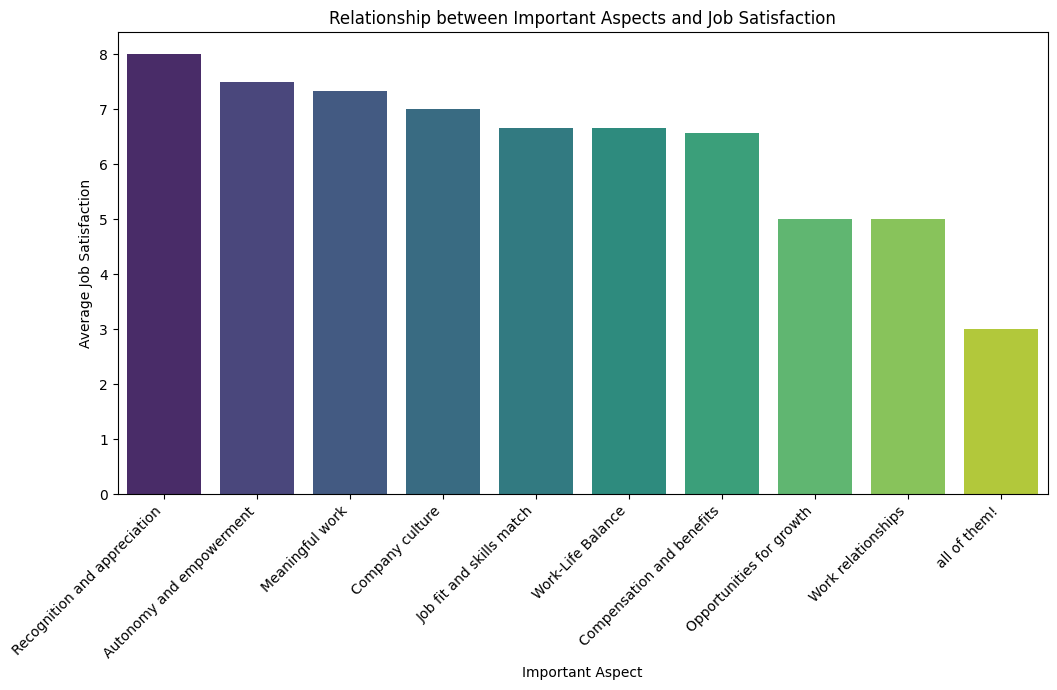

In [33]:
pivot_table = Survey_data.pivot_table(values='Job_satisfaction', index='Important_Aspect', aggfunc='mean')

sorted_pivot_table = pivot_table.sort_values(by='Job_satisfaction', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_pivot_table.index, y=sorted_pivot_table['Job_satisfaction'], palette='viridis')
plt.title('Relationship between Important Aspects and Job Satisfaction')
plt.xlabel('Important Aspect')
plt.ylabel('Average Job Satisfaction')
plt.xticks(rotation=45, ha='right')
plt.show()





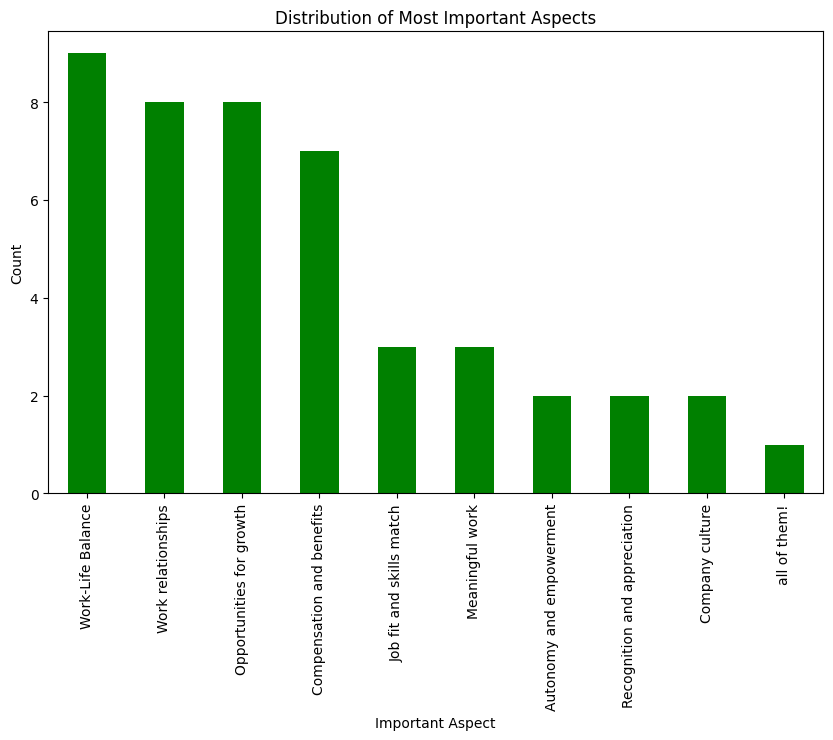

In [34]:
plt.figure(figsize=(10, 6))
Survey_data['Important_Aspect'].value_counts().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Distribution of Most Important Aspects')
plt.xlabel('Important Aspect')
plt.ylabel('Count')
plt.show()


In [35]:
# Creating a predictive model

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = Survey_data.dropna(subset=['Happiness_level'])

X = data[['Work-life_balance', 'Stress_level', 'Job_satisfaction']]
y = data['Happiness_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


Mean Squared Error: 1.7913167246928856
Coefficients: [0.87853078 0.08204545 0.2188823 ]
Intercept: 2.326719222909005
